# Ford GoBike System Data Exploration
## by Emmanuel Williams

## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

>


## Dataset Overview

> The data consists of information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
trips=pd.read_csv('trip_copy.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> This first visualization shows the count of bike rides across the combined weekly basis for this month of february. 
  It shows that Thursday has the highest bike ride count with a gradual regression across the week, with weekends of Saturday & Sunday being the least occupied days for usage.
 

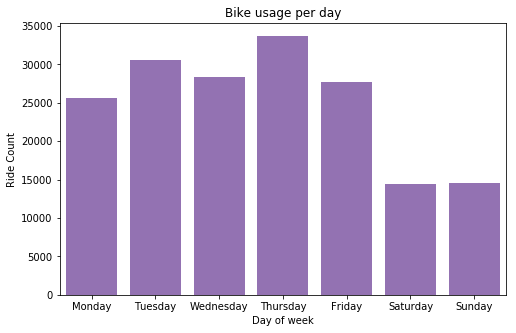

In [3]:
# This bar chart shows the count of bike rides per day across the week
freq = trips['day'].value_counts()

weekdays = ['Monday','Tuesday','Wednesday','Thursday',
            'Friday','Saturday','Sunday']
plt.figure(figsize=[8,5])
base_color = sns.color_palette()[4]

sns.countplot(data=trips,x='day',color=base_color,order=weekdays)
plt.title('Bike usage per day')
plt.xlabel('Day of week')
plt.ylabel('Ride Count')
plt.show();

## (Visualization 2)

> Using a Boxplot it show the distribution of the age range across the various periods of the day. As can be seen across all periods the major density of each lies within the ages of 25-40 years of age.

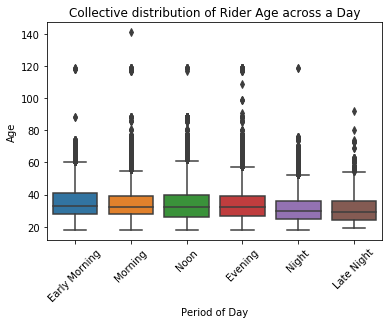

In [3]:
period=['Early Morning','Morning','Noon','Evening','Night','Late Night']
sns.boxplot(data=trips, x='period', y='Age',order=period)
plt.title('Collective distribution of Rider Age across a Day')
plt.xlabel('Period of Day')
plt.xticks(rotation=45);

## (Visualization 3)
> Lastly, a scatterplot comparing the ride duration with the Age range across each day in the week. 
The purpose of this was to get an overall view of how much the day of the week played a factor in which age range had the most bike rides as well as how long the duration was.


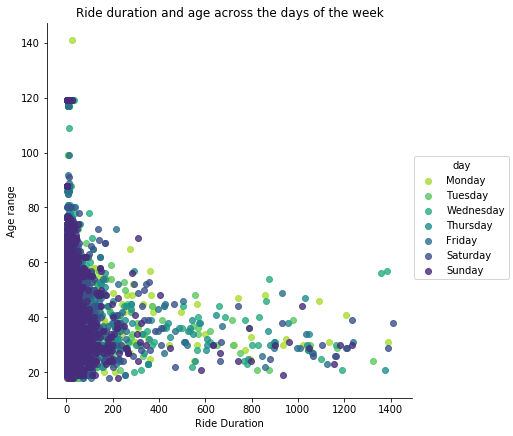

In [5]:
#This highlights the various days of the week when comparing the user types, the ride duration and their age
weekdays = ['Monday','Tuesday','Wednesday','Thursday',
            'Friday','Saturday','Sunday']
g= sns.FacetGrid(data = trips, hue = 'day',
                 palette='viridis_r',size=6,hue_order=weekdays)

g.map(sns.regplot, 'duration_min', 'Age',x_jitter=0.1,fit_reg= False)
g.add_legend();
plt.title('Ride duration and age across the days of the week')
plt.xlabel('Ride Duration')
plt.ylabel('Age range');